In [9]:
import ffmpeg
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [20]:
in_filename = "Seinfeld.S04E10.720p.WEBrip.AAC.x264.Bia2HD.mkv"

In [21]:
probe = ffmpeg.probe(in_filename)
video_stream = next((stream for stream in probe['streams'] if stream['codec_type'] == 'video'), None)
width = int(video_stream['width'])
height = int(video_stream['height'])

In [22]:
width, height

(1280, 720)

In [23]:
def get_frame_n(frame_number, filename):
    out, _ = (
        ffmpeg
        .input(filename)
        .filter('select', 'gte(n,{})'.format(frame_number))
        .output('pipe:', vframes=1, format='rawvideo', pix_fmt='rgb24')
        .run(capture_stdout=True)
    )
    
    image = (
        np
        .frombuffer(out, np.uint8)
        .reshape([height, width, 3])
    )
    
    return image
    

ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid -

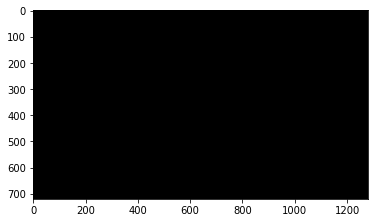

In [24]:
f = get_frame_n(1, in_filename)
plt.imshow(f)
plt.show()

ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid -

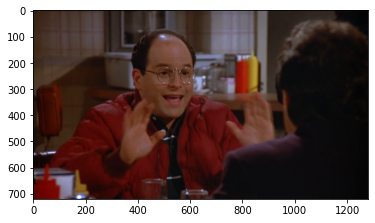

In [26]:
f = get_frame_n(8000, in_filename)
plt.imshow(f)
plt.show()

In [33]:
process1 = (
    ffmpeg
    .input(in_filename)
    .output('pipe:', format='rawvideo', pix_fmt='rgb24')
    .run_async(pipe_stdout=True)
)

process2 = (
    ffmpeg
    .input('pipe:', format='rawvideo', pix_fmt='rgb24', s='{}x{}'.format(width, height))
    .output("shortseinfeld.mp4", format='mp4')
    .overwrite_output()
    .run_async(pipe_stdin=True)
)

count = 0
while True:
    in_bytes = process1.stdout.read(width * height * 3)
    count += 1
    if not in_bytes:
        break
        
    in_frame = (
        np
        .frombuffer(in_bytes, np.uint8)
        .reshape([height, width, 3])
    )
    
    if count % 100 == 0:
        process2.stdin.write(
            in_frame
            .astype(np.uint8)
            .tobytes()
        )

process2.stdin.close()
process1.wait()
process2.wait()


ffmpeg version n4.4.1ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers Copyright (c) 2000-2021 the FFmpeg developers

  built with gcc 11.1.0 (GCC)
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --en

0